Import necssary libraries and modules

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score

Import training, validation and testing datasets

In [2]:
# Load the train dataset
train_data = pd.read_csv('/kaggle/input/layer11/train.csv')
# Load the valid dataset
valid_data = pd.read_csv('/kaggle/input/layer11/valid.csv')
# Load the valid dataset
test_data = pd.read_csv('/kaggle/input/layer11/test.csv')

Visualize original training data

In [3]:
train_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.031138,0.079892,0.157382,-0.014636,-0.051778,-0.021332,-0.073593,-0.005386,-0.212557,0.099683,...,-0.085248,-0.096007,-0.000766,0.021399,-0.041432,0.094806,45,NaN,1,6
1,0.113040,0.175731,0.217741,-0.196254,-0.010129,-0.030586,0.067114,-0.072412,-0.239192,0.104741,...,-0.090283,-0.053885,-0.010967,0.062209,-0.122958,0.192949,45,NaN,1,6
2,0.048570,0.091281,0.160776,-0.150937,0.020115,0.044117,-0.050092,-0.045661,-0.155332,0.117206,...,-0.021524,-0.008411,-0.006248,0.031468,-0.056915,0.154731,45,NaN,1,6
3,0.039212,0.118388,0.173831,-0.096659,-0.008702,0.061298,0.008974,-0.003277,-0.065046,0.095480,...,-0.071936,-0.023120,-0.007812,0.057600,-0.121892,0.072796,45,NaN,1,6
4,0.056019,0.170639,0.157917,-0.228605,-0.065965,-0.088732,-0.082243,-0.080568,-0.341500,0.142430,...,-0.155621,-0.079447,0.015316,0.127726,-0.151966,0.169634,45,NaN,1,6


Process the data to remove null values for labels and estimate missing values in features

Drop the columns where there are null values for the lables in the training dataset

In [4]:
# Check for null values in train dataset
train_null_counts = train_data.isnull().sum()
print("train null counts : \n {}".format(train_null_counts))

# Drop rows with null values in the final four columns (target labels) for train dataset
#train_data = train_data.dropna(subset=train_data.columns[-4:], how='any')

train null counts : 
 feature_1        0
feature_2        0
feature_3        0
feature_4        0
feature_5        0
              ... 
feature_768      0
label_1          0
label_2        480
label_3          0
label_4          0
Length: 772, dtype: int64


Fill the null values in the features with their means in the train, valid and test datasets.

In [5]:
# Fill null values with mean in train dataset
train_data = train_data.fillna(train_data.mean())

# Fill null values with mean in valid dataset
valid_data = valid_data.fillna(valid_data.mean())

# Fill null values with mean in test dataset
test_data = test_data.fillna(test_data.mean())

In [6]:
# Concatenate train and valid datasets vertically
#train_data = pd.concat([train_data, valid_data], axis=0, ignore_index=True)

Visualize processed training data

In [7]:
columns_to_remove = ['ID']
# Create a new DataFrame to hold the dropped column
saved_id_column = test_data[columns_to_remove].copy()

test_data = test_data.drop(columns=columns_to_remove)

In [8]:
train_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.031138,0.079892,0.157382,-0.014636,-0.051778,-0.021332,-0.073593,-0.005386,-0.212557,0.099683,...,-0.085248,-0.096007,-0.000766,0.021399,-0.041432,0.094806,45,27.975107,1,6
1,0.113040,0.175731,0.217741,-0.196254,-0.010129,-0.030586,0.067114,-0.072412,-0.239192,0.104741,...,-0.090283,-0.053885,-0.010967,0.062209,-0.122958,0.192949,45,27.975107,1,6
2,0.048570,0.091281,0.160776,-0.150937,0.020115,0.044117,-0.050092,-0.045661,-0.155332,0.117206,...,-0.021524,-0.008411,-0.006248,0.031468,-0.056915,0.154731,45,27.975107,1,6
3,0.039212,0.118388,0.173831,-0.096659,-0.008702,0.061298,0.008974,-0.003277,-0.065046,0.095480,...,-0.071936,-0.023120,-0.007812,0.057600,-0.121892,0.072796,45,27.975107,1,6
4,0.056019,0.170639,0.157917,-0.228605,-0.065965,-0.088732,-0.082243,-0.080568,-0.341500,0.142430,...,-0.155621,-0.079447,0.015316,0.127726,-0.151966,0.169634,45,27.975107,1,6


Separate features and labels in the train, valid and test datasets

In [9]:
# Separate features and labels in train dataset
train_features = train_data.iloc[:, :-4]
train_labels = train_data.iloc[:, -4:]

# Separate features and labels in valid dataset
valid_features = valid_data.iloc[:, :-4]
valid_labels = valid_data.iloc[:, -4:]

# Separate features and labels in test dataset
test_features = test_data


Extract the third label in the train, valid and test datasets

In [10]:
# get the third label of the train dataset
train_label3 = train_labels.iloc[:,2]

# get the third label of the valid dataset
valid_label3 = valid_labels.iloc[:,2]


# Predicting Label 3 without Feature Engineering

Predict label 3 without feature engineering steps and techniques

Make copies of the features and labels of the datasets to be used in the models without feature engineering

In [11]:
# Make a copy features and labels in train dataset
train_features_copy = train_features.copy()
train_labels_copy = train_labels.copy()

# Make a copy features and labels in valid dataset
valid_features_copy = valid_features.copy()
valid_labels_copy = valid_labels.copy()

# Make a copy features and labels in test dataset
test_features_copy = test_features.copy()


Make copies of the label 3 of the datasets to be used in the models without feature engineering

In [12]:
# Make a copy of the third label of the train dataset
train_label3_copy = train_label3.copy()

# Make a copy of the third label of the valid dataset
valid_label3_copy = valid_label3.copy()



Standardize the features of all datasets

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training features
standardized_train_features = scaler.fit_transform(train_features)

# Transform the validation and test features using the same scaler
standardized_valid_features = scaler.transform(valid_features)
standardized_test_features = scaler.transform(test_features)

Use the raw scaled features to train the best model which is KNN

In [14]:
best_params = {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}

# Define a list of classification models
classification_models = [
   
    # ('Decision Tree', DecisionTreeClassifier()),
    # ('Random Forest', RandomForestClassifier()),
    # ('XGBoost', XGBClassifier()),
    ('SVM', SVC())
]

# All models perform very well. Chose KNN

# Number of features used in PCA
#num_features = pca_train_result.shape[1]
#print(f"Number of features: {num_features}\n")

# Train and evaluate each classification model
for model_name, model in classification_models:
    # Train the model on the training data
    model.fit(standardized_train_features, train_label3_copy)

    # Predict on the train data
    y_pred_train = model.predict(standardized_train_features)

    # Calculate metrics for classification evaluation
    accuracy = accuracy_score(train_label3, y_pred_train)
    precision = precision_score(train_label3, y_pred_train, average='weighted' , zero_division=1)
    recall = recall_score(train_label3, y_pred_train, average='weighted')

    print(f"Metrics for {model_name} on train data:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Predict on the validation data
    y_pred_valid = model.predict(standardized_valid_features)

    # Calculate metrics for classification evaluation on validation data
    accuracy = accuracy_score(valid_label3, y_pred_valid)
    precision = precision_score(valid_label3, y_pred_valid, average='weighted', zero_division=1)
    recall = recall_score(valid_label3, y_pred_valid, average='weighted')

    print(f"Metrics for {model_name} on validation data:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Predict on the test data
    #y_pred_test = model.predict(pca_test_result)

Metrics for SVM on train data:
Accuracy: 0.99
Precision: 0.99
Recall: 0.99


Metrics for SVM on validation data:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00




Used the trained model on all features to predict the valid and test data and get metrics

# Predicting Label 3 with Feature Engineering

Predict label 3 with feature engineering steps and techniques

## Feature Engineering

Use feature selection based on correlation matrix and feature extraction based on PCA

### Feature Selection

Visualize the distribution of the training label 3

Calculate the correlation matrix of the training data features

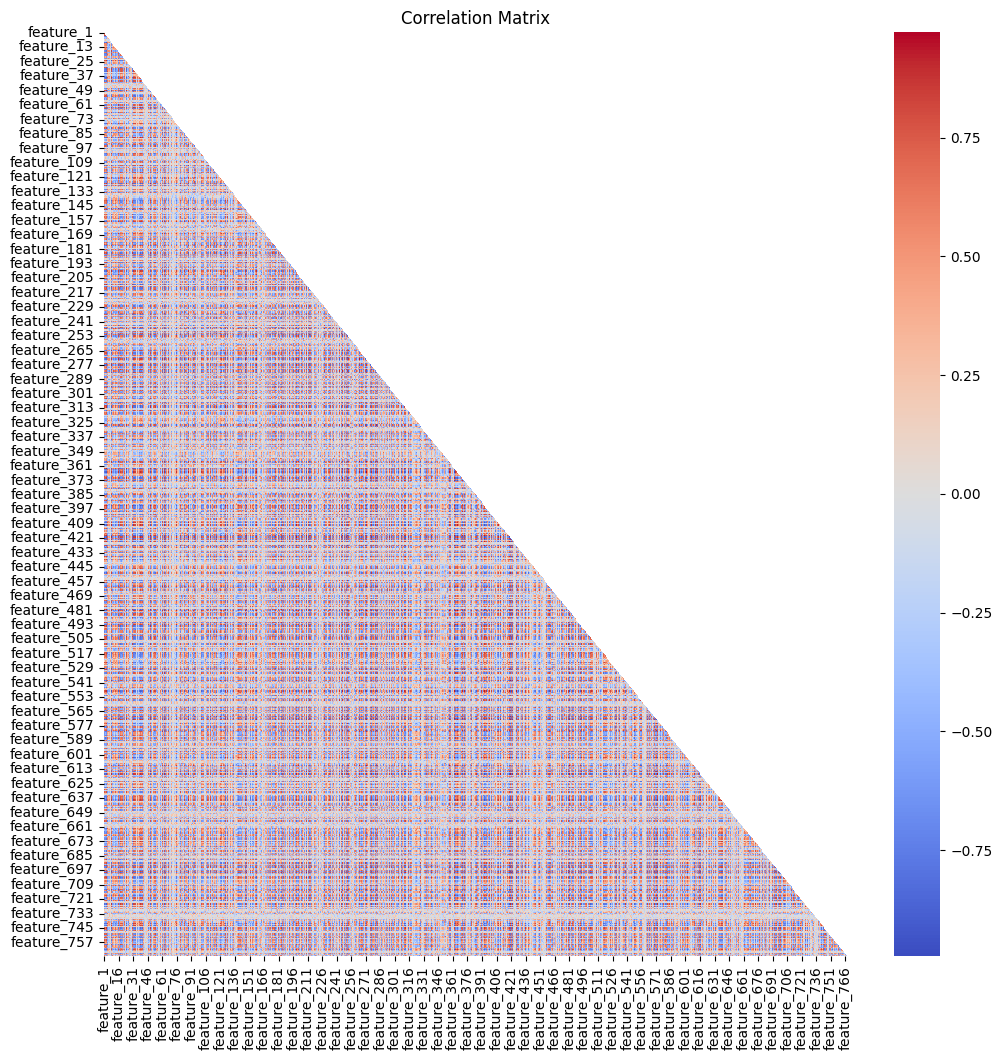

In [15]:
#Calculate the correlation matrix
correlation_matrix = train_features.corr()

mask = np.triu(np.ones_like(correlation_matrix))

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, mask=mask)
plt.title("Correlation Matrix")
plt.show()

Identify the features that are highly correlated with each other using the traning dataset

In [16]:
# Set the threshold for correlation
correlation_threshold = 0.99

highly_correlated = set()

# Find highly correlated features
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

print(highly_correlated)

set()


Remove the previously identified highly correlated features from all the datasets

In [17]:
# Remove highly correlated features
train_features = train_features.drop(columns=highly_correlated)
valid_features = valid_features.drop(columns=highly_correlated)
test_features = test_features.drop(columns=highly_correlated)

Display the resulting feature shapes of the datasets

In [18]:
# Display the filtered train feature count
print("Filtered train features: {}".format(train_features.shape))

# Display the filtered valid feature count
print("Filtered valid features: {}".format(valid_features.shape))

# Display the filtered test feature count
print("Filtered test features: {}".format(test_features.shape))

Filtered train features: (28520, 768)
Filtered valid features: (750, 768)
Filtered test features: (744, 768)


Identify the features that are highly correlated with the label using the traning dataset

In [19]:
# Calculate the correlation matrix between features and train_label3
correlation_with_target = train_features.corrwith(train_label3)

# Set the correlation threshold
correlation_threshold = 0.01

# Select features that meet the correlation threshold
highly_correlated_features = correlation_with_target[correlation_with_target.abs() > correlation_threshold]

print(highly_correlated_features)

feature_1      0.097762
feature_3     -0.018345
feature_4     -0.070020
feature_5      0.125241
feature_6     -0.068133
                 ...   
feature_764    0.114859
feature_765    0.048671
feature_766   -0.120415
feature_767    0.010019
feature_768    0.057092
Length: 690, dtype: float64


Extract the features that are only highly correlated with the label from all datasets

In [20]:
# Drop the features with low correlated in train data
train_features = train_features[highly_correlated_features.index]

# Drop the features with low correlated in valid data
valid_features = valid_features[highly_correlated_features.index]

# Drop the features with low correlated in test data
test_features = test_features[highly_correlated_features.index]

Display the resulting feature shapes of the datasets

In [21]:
# Display the filtered train feature count
print("Filtered train features: {}".format(train_features.shape))

# Display the filtered valid feature count
print("Filtered valid features: {}".format(valid_features.shape))

# Display the filtered test feature count
print("Filtered test features: {}".format(test_features.shape))

Filtered train features: (28520, 690)
Filtered valid features: (750, 690)
Filtered test features: (744, 690)


Standardize the features of all datasets

In [22]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()
#scaler = StandardScaler()
standardized_train_features = scaler.fit_transform(train_features)
standardized_valid_features = scaler.transform(valid_features)
standardized_test_features = scaler.transform(test_features)

### Feature Extraction

Extract can combine the features that are highly significant in predicting the label using Principal Componenet Analysis(PCA)

Extract the features that can explain the variance of the label to 99%

Display the resulting explained variances of each principal component

Explained Variance Ratio after Dimensionality Reduction: [3.97891454e-01 9.37205633e-02 4.62798626e-02 3.59523097e-02
 2.66521472e-02 2.57143912e-02 1.88490040e-02 1.63515360e-02
 1.53080109e-02 1.37059732e-02 1.17253730e-02 1.09645776e-02
 9.26621593e-03 8.89588984e-03 8.45437292e-03 7.55062319e-03
 7.46383624e-03 6.53553275e-03 6.14857680e-03 5.96261743e-03
 5.46041379e-03 5.04730358e-03 4.92596364e-03 4.71423550e-03
 4.62585735e-03 4.17559923e-03 4.00691948e-03 3.85372150e-03
 3.59098852e-03 3.48327280e-03 3.34965321e-03 3.31621251e-03
 3.22151723e-03 3.14815626e-03 2.97031693e-03 2.83669194e-03
 2.74674909e-03 2.63246931e-03 2.53070598e-03 2.45200474e-03
 2.43735764e-03 2.41080680e-03 2.32022742e-03 2.20880536e-03
 2.07949798e-03 2.04589431e-03 1.98955505e-03 1.94499415e-03
 1.90704932e-03 1.84187376e-03 1.79858412e-03 1.75366775e-03
 1.73992606e-03 1.68259281e-03 1.66911633e-03 1.62921204e-03
 1.57257895e-03 1.54310261e-03 1.49499011e-03 1.48452685e-03
 1.40183040e-03 1.38798971e-

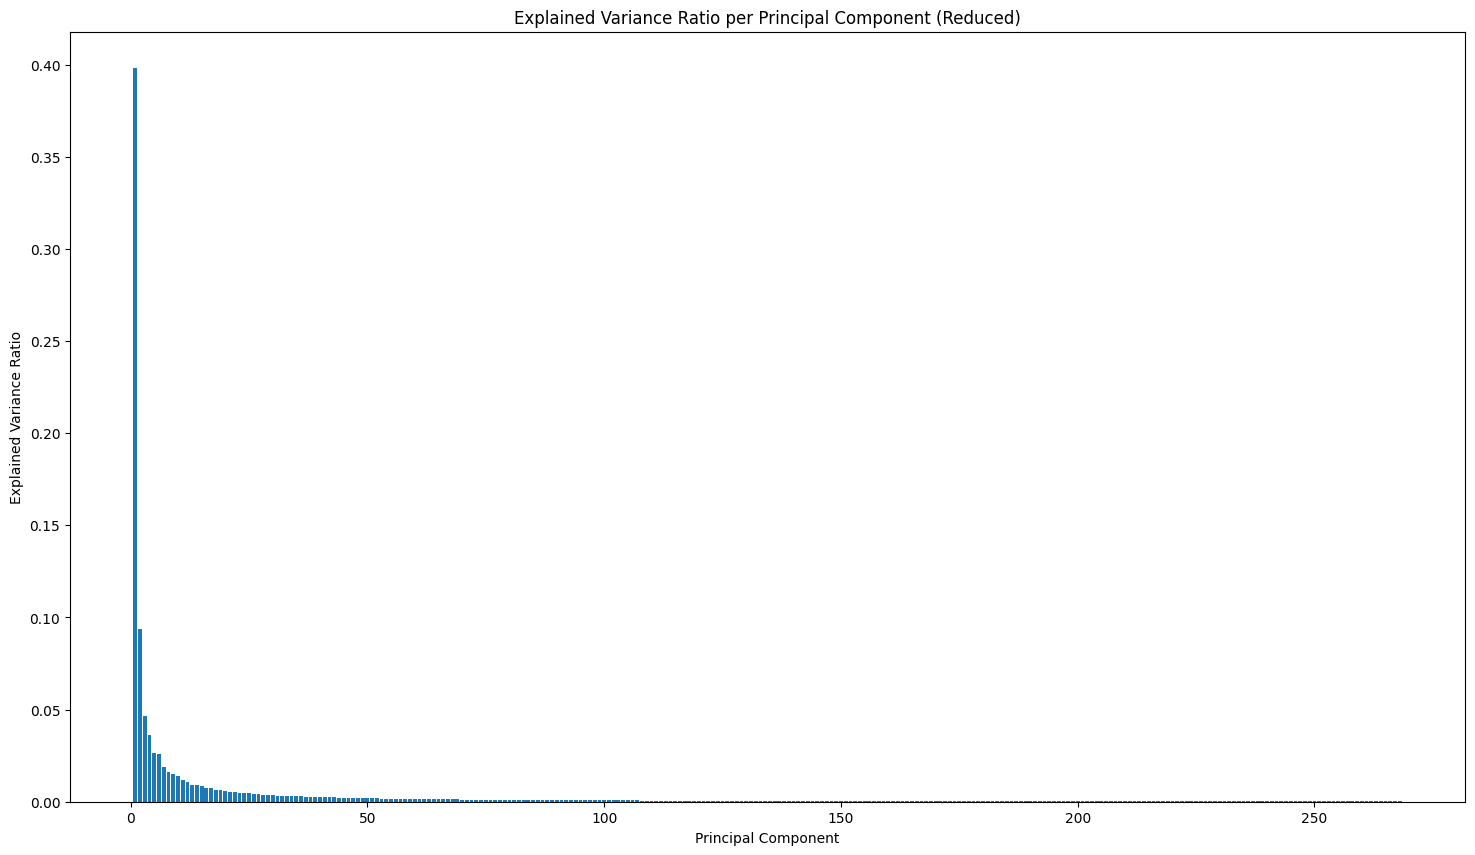

Reduced Train feature matrix shape: (28520, 268)
Reduced valid feature matrix shape: (750, 268)
Reduced test feature matrix shape: (744, 268)


In [23]:
variance_threshold = 0.98

# Apply PCA with the determined number of components
pca = PCA(n_components=variance_threshold, svd_solver='full')

pca_train_result = pca.fit_transform(standardized_train_features)
pca_valid_result = pca.transform(standardized_valid_features)
pca_test_result = pca.transform(standardized_test_features)

# Explained variance ratio after dimensionality reduction
explained_variance_ratio_reduced = pca.explained_variance_ratio_
print("Explained Variance Ratio after Dimensionality Reduction:", explained_variance_ratio_reduced)

# Plot explained variance ratio
plt.figure(figsize=(18, 10))
plt.bar(range(1, pca_train_result.shape[1] + 1), explained_variance_ratio_reduced)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component (Reduced)')
plt.show()

# Display the reduced train feature matrix
print("Reduced Train feature matrix shape: {}".format(pca_train_result.shape))
# Display the reduced valid feature matrix
print("Reduced valid feature matrix shape: {}".format(pca_valid_result.shape))
# Display the reduced test feature matrix
print("Reduced test feature matrix shape: {}".format(pca_test_result.shape))

## Model Selection

Select the model that best predicts the valid and test datasets based on accuracy, precision and recall

In [24]:
best_params = {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

# Define a list of classification models
classification_models = [
    #('K Neighbors', KNeighborsClassifier()),
    # ('Decision Tree', DecisionTreeClassifier()),
    # ('Random Forest', RandomForestClassifier()),
    # ('XGBoost', XGBClassifier()),
     ('SVM', SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])),
]

# All models perform very well. Chose KNN

# Number of features used in PCA
num_features = pca_train_result.shape[1]
print(f"Number of features: {num_features}\n")

# Train and evaluate each classification model
for model_name, model in classification_models:
    # Train the model on the training data
    model.fit(pca_train_result, train_label3)

    # Predict on the train data
    y_pred_train = model.predict(pca_train_result)

    # Calculate metrics for classification evaluation
    accuracy = accuracy_score(train_label3, y_pred_train)
    precision = precision_score(train_label3, y_pred_train, average='weighted' , zero_division=1)
    recall = recall_score(train_label3, y_pred_train, average='weighted')

    print(f"Metrics for {model_name} on train data:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Predict on the validation data
    y_pred_valid = model.predict(pca_valid_result)

    # Calculate metrics for classification evaluation on validation data
    accuracy = accuracy_score(valid_label3, y_pred_valid)
    precision = precision_score(valid_label3, y_pred_valid, average='weighted', zero_division=1)
    recall = recall_score(valid_label3, y_pred_valid, average='weighted')

    print(f"Metrics for {model_name} on validation data:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Predict on the test data
    y_pred_test = model.predict(pca_test_result)

   


Number of features: 268

Metrics for SVM on train data:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


Metrics for SVM on validation data:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00




# Generate Output CSV

Define method to create the csv file

In [25]:
# define method to create the dataframe and save it as a csv file
def create_csv(pred_after_fe):

  df = pd.DataFrame()

  df.insert(loc=0, column='ID', value=saved_id_column)
  df.insert(loc=1, column='Label 1', value=pred_after_fe)
 
  df.to_csv('/kaggle/working/190458T_label_3.csv', index=False)

Create CSV file

In [26]:
# create the csv output file
create_csv(y_pred_test)